In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import math

#### 正弦函数

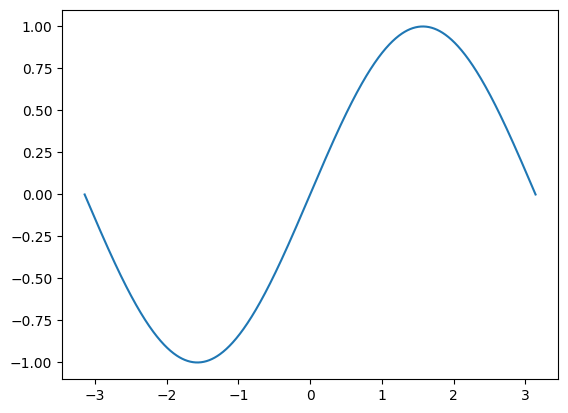

In [8]:
x = torch.linspace(-math.pi, math.pi, 1000).unsqueeze(1)
y = torch.sin(x)

plt.plot(x, y)

#### 采数据集

In [9]:
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

#### 定义两层ReLU网络

In [10]:
class myModel(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.net(x)

#### 初始化模型

In [11]:
hidden_size = 256
learning_rate = 1e-3
num_epochs = 2000

model = myModel(hidden_size)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_func = nn.MSELoss()

#### 训练模型

In [13]:
for epoch in range(num_epochs):
    for input, output in dataloader:
        y_predict = model(input)
        loss = loss_func(y_predict, output)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss*1000:.5f}')

Epoch [100/2000], Loss: 0.00220
Epoch [200/2000], Loss: 0.00080
Epoch [300/2000], Loss: 0.00602
Epoch [400/2000], Loss: 0.07085
Epoch [500/2000], Loss: 0.00075
Epoch [600/2000], Loss: 0.44337
Epoch [700/2000], Loss: 0.01382
Epoch [800/2000], Loss: 0.00017
Epoch [900/2000], Loss: 0.01599
Epoch [1000/2000], Loss: 0.96417
Epoch [1100/2000], Loss: 0.00006
Epoch [1200/2000], Loss: 0.00226
Epoch [1300/2000], Loss: 0.00268
Epoch [1400/2000], Loss: 0.00209
Epoch [1500/2000], Loss: 0.00161
Epoch [1600/2000], Loss: 0.00008
Epoch [1700/2000], Loss: 0.00296
Epoch [1800/2000], Loss: 0.00028
Epoch [1900/2000], Loss: 0.02339
Epoch [2000/2000], Loss: 0.00007


#### 评估模型

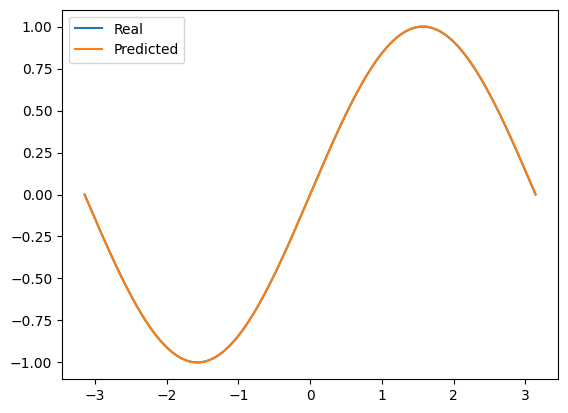

In [14]:
with torch.no_grad():
    predictions = model(x)

plt.plot(x, y, label='Real')
plt.plot(x, predictions, label='Predicted')
plt.legend()